## Boston marathon data 2014

Perform clustering on this data. Determine which clustering solution, including number of clusters and algorithm used, is best for the marathos data. Write a data story, including visualizations with insights on the marathon from clusters.

Data sources: [github](https://github.com/llimllib/bostonmarathon)

Questions that I am interested in: 
- How gender is clustered with finish time
- How different age groups are clustered wrt finish time 
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn import metrics
from itertools import cycle

import matplotlib.cm as cm

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv('boston_2014.csv', encoding='iso-8859-1')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.shape

(31984, 21)

In [5]:
df = df.replace(to_replace='-')

In [6]:
df.isna().sum()
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [7]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [36]:
int_cols = ['10k', '25k', '35k', '30k', '5k','half', '20k','40k', 'official']

for col in int_cols:
    print(col)
    df[col] = df[col].astype('float')

10k
25k
35k
30k
5k
half
20k
40k
official


In [37]:
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender         int64
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [38]:
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.807495,1932.563032,133.771696,0.550807,42.407079,242.997314,8051.044741,196.870568,15939.587825,9.275658,164.604685,25.759957,111.685348,105.735206,229.056082
std,8.966371,1715.228694,25.654304,0.497420,11.316496,52.300431,4754.005626,41.977707,9232.978224,1.992486,33.970734,4.329492,21.059566,19.786613,49.188769
min,16.620000,1.000000,45.800000,0.000000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.550000,0.000000,33.000000,205.527500,3972.000000,167.130000,7943.750000,7.850000,140.670000,22.650000,96.850000,91.770000,193.830000
50%,50.350000,1425.000000,129.030000,1.000000,42.000000,232.370000,7970.000000,188.180000,15939.500000,8.870000,157.770000,25.100000,107.870000,102.180000,218.880000
75%,57.180000,2611.000000,148.080000,1.000000,50.000000,273.235000,11968.000000,220.180000,23935.250000,10.430000,182.972500,28.480000,123.080000,116.550000,257.530000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


In [39]:
df.columns#sns.distplot(df.half)

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


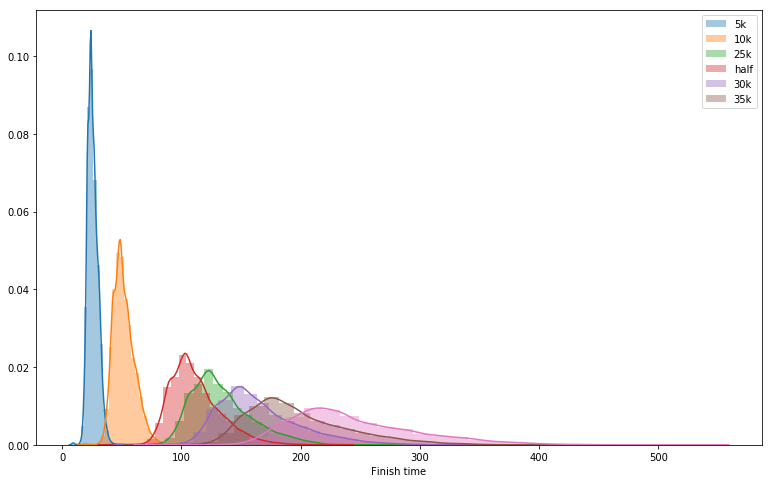

In [40]:
plt.figure(figsize=(13,8))

sns.distplot(df['5k'], bins=30)
sns.distplot(df['10k'], bins=30)
sns.distplot(df['25k'], bins=30)
sns.distplot(df['half'], bins=30)
sns.distplot(df['30k'], bins=30)
sns.distplot(df['35k'], bins=30)
sns.distplot(df.official, bins=30)

plt.legend(['5k', '10k', '25k', 'half','30k', '35k'])
plt.xlabel('Finish time')
plt.show()

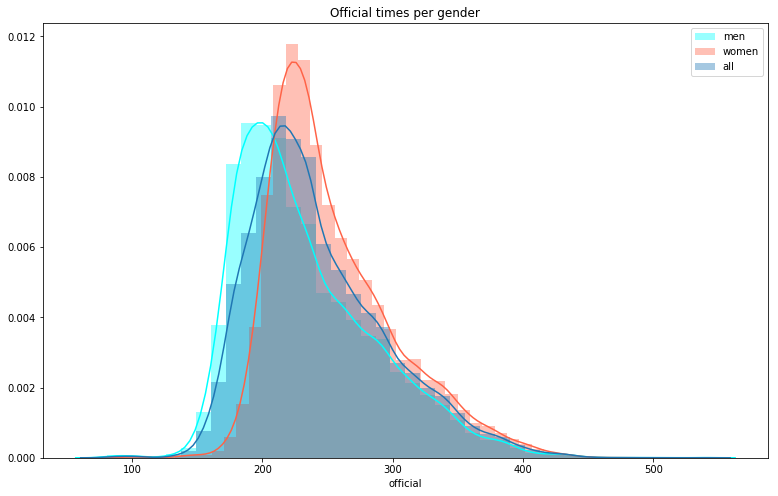

In [18]:
plt.figure(figsize=(13,8))
sns.distplot(df[df.gender=='M']['official'], color='cyan', bins=40, kde=True)
sns.distplot(df[df.gender=='F']['official'], color='tomato', bins=40, kde=True)
sns.distplot(df.official, bins=40)
plt.legend(['men', 'women', 'all'])
plt.title('Official times per gender')
plt.show()

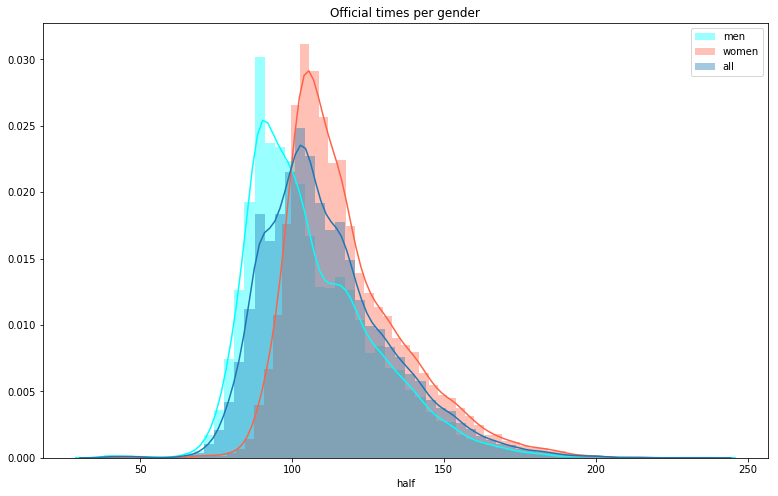

In [108]:
plt.figure(figsize=(13,8))
sns.distplot(df[df.gender=='M']['half'], color='cyan', bins=60, kde=True)
sns.distplot(df[df.gender=='F']['half'], color='tomato', bins=60, kde=True)
sns.distplot(df['half'],bins=60, kde=True)
plt.legend(['men', 'women', 'all'])
plt.title('Official times per gender')
plt.show()

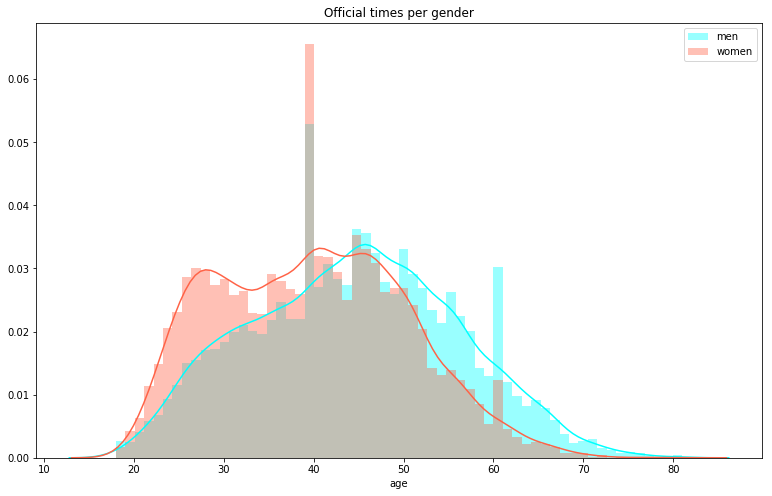

In [109]:
plt.figure(figsize=(13,8))
sns.distplot(df[df.gender=='M']['age'], color='cyan', bins=60, kde=True)
sns.distplot(df[df.gender=='F']['age'], color='tomato', bins=60, kde=True)
#sns.distplot(df['age'],bins=60, kde=True)
plt.legend(['men', 'women'])
plt.title('Official times per gender')
plt.show()

normalization is important when there are different numbers, as in the case of  gender here in this dataset.


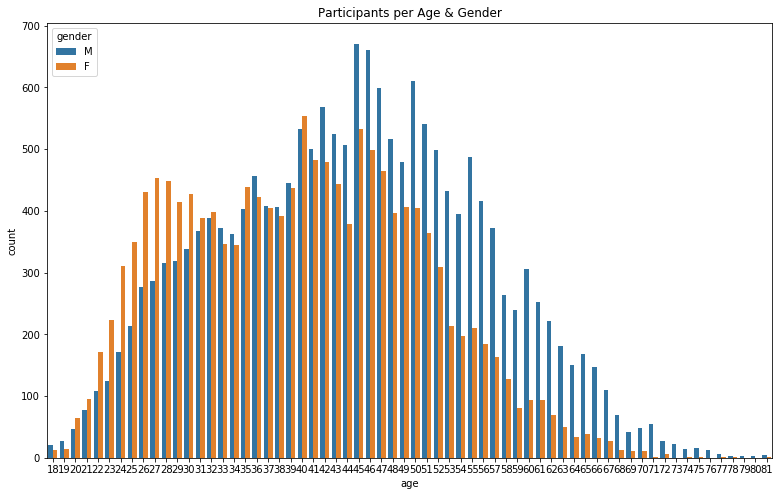

In [19]:
g = sns.countplot('age', data=df,  hue='gender')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age & Gender")
plt.show()

(array([1468., 4274., 4690., 6579., 6108., 4665., 2887., 1020.,  239.,
          54.]),
 array([18. , 24.3, 30.6, 36.9, 43.2, 49.5, 55.8, 62.1, 68.4, 74.7, 81. ]),
 <a list of 10 Patch objects>)

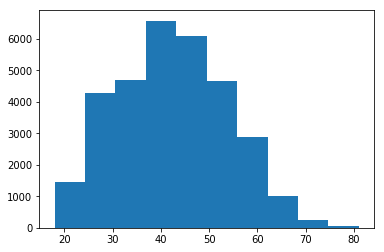

In [20]:
plt.hist(df.age)

more men than women run marathon


In [27]:
df.groupby('gender').half.mean()

gender
F    117.950182
M    106.576256
Name: half, dtype: float64

Text(0.5,1,'Finish time with age and gender')

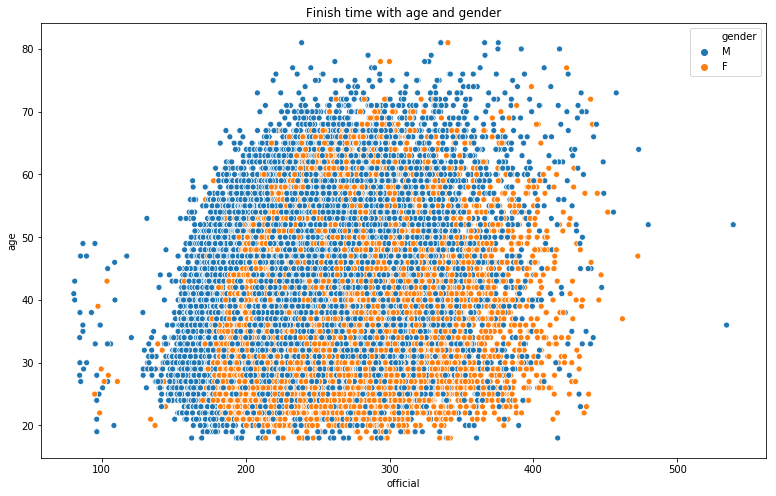

In [28]:
g = sns.scatterplot(data=df, x='official', y='age', hue='gender')
g.figure.set_size_inches(13,8)
g.set_title('Finish time with age and gender')

In [29]:
df.gender = np.where(df.gender=='M', 1, 0)

In [30]:
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender         int64
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [31]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,1,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,0,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,1,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,0,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,1,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [32]:
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.807495,1932.563032,133.771696,0.550807,42.407079,242.997314,8051.044741,196.870568,15939.587825,9.275658,164.604685,25.759957,111.685348,105.735206,229.056082
std,8.966371,1715.228694,25.654304,0.497420,11.316496,52.300431,4754.005626,41.977707,9232.978224,1.992486,33.970734,4.329492,21.059566,19.786613,49.188769
min,16.620000,1.000000,45.800000,0.000000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.550000,0.000000,33.000000,205.527500,3972.000000,167.130000,7943.750000,7.850000,140.670000,22.650000,96.850000,91.770000,193.830000
50%,50.350000,1425.000000,129.030000,1.000000,42.000000,232.370000,7970.000000,188.180000,15939.500000,8.870000,157.770000,25.100000,107.870000,102.180000,218.880000
75%,57.180000,2611.000000,148.080000,1.000000,50.000000,273.235000,11968.000000,220.180000,23935.250000,10.430000,182.972500,28.480000,123.080000,116.550000,257.530000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


## Clustering

First divide the dataset into four clusters. 

In [33]:
# Make sure we have evenly distributed number of rows

rows = df.shape[0] - df.shape[0] %4
df = df.iloc[:rows, :]

In [34]:
df.shape[0]

31984

### Hypothesis

Depending on age groups and gender  participants take different times and I want to see how the clusters are formed. 

In [41]:
# Take all 

int_cols

['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k', 'official']

In [43]:
#['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k'. 'age', 'gender']


In [44]:
# Break into a set of features and a variable for the known outcome. 
# y - trying to understand what sort clusters can be formed from the variable you can choose whatever you want to see. 

X = df[int_cols]
y = df.gender

In [45]:
# Normalize, for PCA as it requires normalization 

X_norm = normalize(X)

In [46]:
# Create the two-feature PCA for graphing 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [47]:
# Split the data into four equally-sized samples. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

In [48]:
# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

In [49]:
X1.shape, X2.shape, X_pca1.shape, X_pca4.shape

((7996, 9), (7996, 9), (7996, 2), (7996, 2))

In [50]:
X_pca[:,0]

array([-0.0015941 , -0.02893222, -0.0071725 , ...,  0.00027454,
        0.00416825, -0.02853705])

In [51]:
X_pca1

array([[-2.08729663e-02, -9.59261430e-04],
       [-7.48168495e-03,  1.38935960e-03],
       [-1.17368028e-02, -7.64256743e-04],
       ...,
       [-2.61645621e-02, -6.33892987e-05],
       [ 3.05571451e-03, -8.38140469e-03],
       [-2.23911346e-02,  7.01590097e-04]])

In [52]:
# Create dataframe to hold ypreds

ypred = pd.DataFrame()

In [53]:
# PCA

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    print(counter)
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred


0
1
2
3


In [54]:
ypred.head(20)

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,clust3_sample0,clust4_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,clust3_sample1,clust4_sample1,pca_f1_sample2,pca_f2_sample2,clust2_sample2,clust3_sample2,clust4_sample2,pca_f1_sample3,pca_f2_sample3,clust2_sample3,clust3_sample3,clust4_sample3
0,-0.020873,-0.000959,1,1,1,-0.016757,0.004846,1,1,1,-0.006710,-0.001587,0,1,0,0.007782,0.000464,1,1,3
1,-0.007482,0.001389,1,1,3,0.007062,0.007875,1,2,0,-0.011125,0.001338,0,1,2,-0.004132,0.003846,0,0,3
2,-0.011737,-0.000764,1,1,1,0.028105,-0.006599,0,0,3,-0.015223,0.000921,0,1,2,-0.014806,0.008332,0,0,0
3,0.014460,-0.003988,0,0,0,-0.009800,-0.000236,1,1,0,0.005598,0.006062,0,0,0,-0.006746,0.004441,0,0,3
4,0.025402,-0.009334,0,0,0,-0.014207,0.001249,1,1,1,0.012910,0.001281,1,0,3,0.012483,0.008532,1,1,3
5,0.045395,-0.020182,0,2,2,0.038597,-0.011763,0,0,3,0.054700,0.019527,1,2,1,-0.026159,0.000466,0,0,0
6,-0.013161,-0.000419,1,1,1,-0.034251,-0.001046,1,1,1,-0.021913,-0.000286,0,1,2,0.004293,-0.003187,0,1,3
7,0.005297,0.003482,1,0,3,0.004443,-0.010153,1,2,0,-0.015492,0.000340,0,1,2,-0.023547,0.000244,0,0,0
8,0.046940,0.005028,0,2,2,0.054644,0.025921,0,0,2,-0.029473,0.001320,0,1,2,0.019186,-0.001729,1,1,2
9,-0.022435,-0.004764,1,1,1,-0.010407,-0.000248,1,1,1,-0.014084,-0.003206,0,1,2,-0.005175,-0.003027,0,0,3


In [55]:
ypred.clust4_sample0.unique()

array([1, 3, 0, 2])

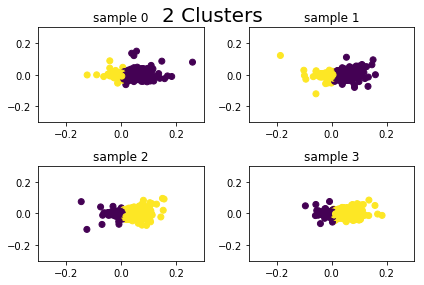

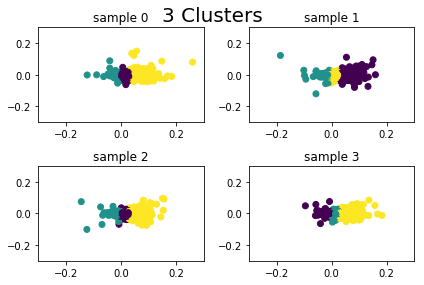

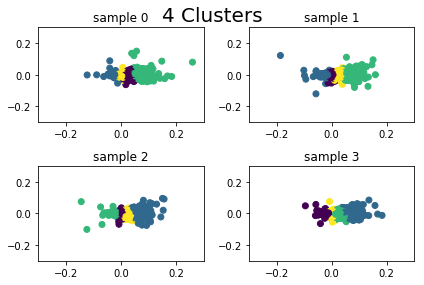

In [56]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features. PCA components 
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments. coloring to the assignment of the cluster
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [57]:
# k = 2

X.head()

,10k,25k,35k,30k,5k,half,20k,40k,official
0,17.37,47.67,71.40,59.18,8.02,39.72,37.65,80.43,85.25
1,32.58,82.43,116.37,99.33,16.22,69.47,65.83,132.10,138.95
2,16.62,45.80,67.42,56.45,7.75,38.03,36.10,76.10,80.60
3,32.57,82.43,116.37,99.33,16.20,69.47,65.83,132.95,140.58
4,17.12,46.37,67.83,57.03,8.02,38.60,36.58,76.72,81.23


In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [59]:
k_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

In [60]:
X['k_means'] = k_pred

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
X['gender'] = y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
# distribution of the gender with how many 
# cluster on the times and now use the clusters to find out how they fall within each category 
# compare the age ratio or the gender ratios between the clusters 

# once the clusters 

# only time data cluster , does the cluster corresponds to gender or 
# in the USL, we are tryong to find the cluseters and the distri of the cluster with some variable that it hasn't sen, and 
# what we see wrt the variable (e.g., gender, age-group) and build the story around it. 
# decide how you want to tell the story. 


# further steps: 

In [68]:
plt.scatter(df.official)

TypeError: scatter() missing 1 required positional argument: 'y'

In [69]:
sns.scatterplot(data=X, x='k-means', hue='gender')

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555


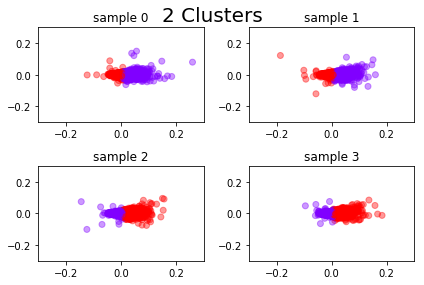



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462


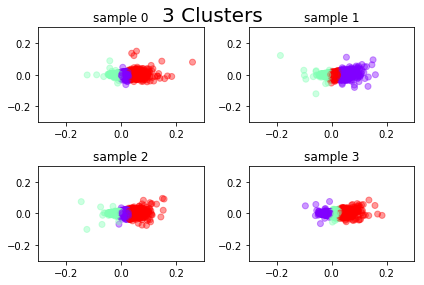



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799


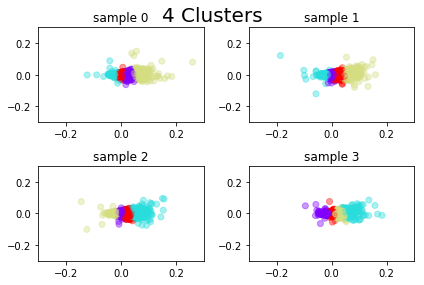



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103


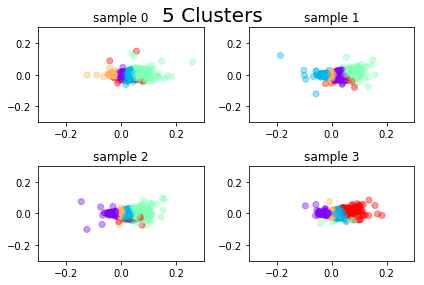



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621


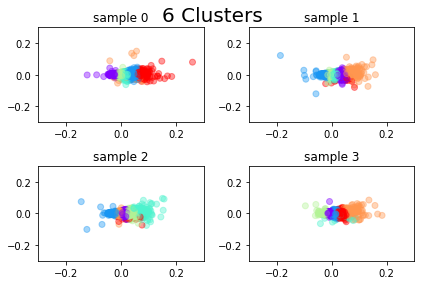



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267


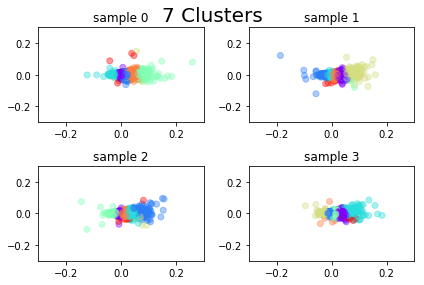



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949


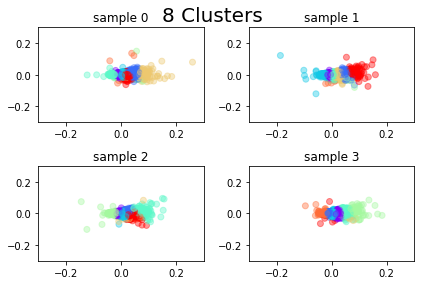



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701


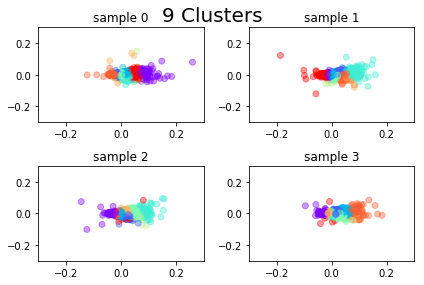



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701
8      10.0    0.312498  0.003773


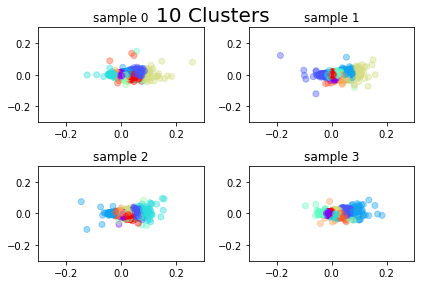



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701
8      10.0    0.312498  0.003773
9      11.0    0.306830  0.006208


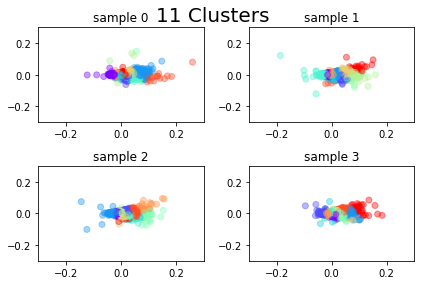



sorted cluster scores:


AttributeError: 'DataFrame' object has no attribute 'sort'

In [70]:

# Create function for clustering 
def evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, clust_range):

    #save clusters in dfs
    plot_clusters = pd.DataFrame()
    cluster_scores = pd.DataFrame(columns=['clusters','mean score','std'])

    # plot each cluster against the corresponding PCA
    for index, data in enumerate([
        (X1, X_pca1),
        (X2, X_pca2),
        (X3, X_pca3),
        (X4, X_pca4)]):

        # Save values in the dataframe created
        plot_clusters['pca_f1' + '_sample' + str(index)] = data[1][:, 0]
        plot_clusters['pca_f2' + '_sample' + str(index)] = data[1][:, 1]

        # Create k-means, n_clusters with user input, get silhouette score and save in the same dataframe as the clusters
        for nclust in range(2, clust_range):
            km = KMeans(n_clusters=nclust, random_state=42)
            km.fit(data[0])
            labels = km.labels_
            cluster_pred = km.predict(data[0])
            plot_clusters['clust' + str(nclust) + '_sample' + str(index)] = cluster_pred
            plot_clusters['sil_score_' + 'clust'+ str(nclust) + '_sample' + str(index)] = \
                                metrics.silhouette_score(data[0], labels, metric='euclidean')

    # visualization
    for nclust in range(2, clust_range):

        # Assign colors and make a grid of subplots 
        colors = cm.rainbow(np.linspace(0, 1, nclust))
        f, plotgrid = plt.subplots(2, 2)
        sil_scores = []

        # Make a plot for each sample 
        for i in range(4):

            current_group = (f'clust{nclust}_sample{i}')

            x_plot = plot_clusters[f'pca_f1_sample{i}']
            y_plot = plot_clusters[f'pca_f2_sample{i}']

            # Cluster assignments
            c = plot_clusters[current_group]

            # Assign the plot to its subgrid/place on the plot
            rows = int(np.floor(i / 2))
                # 0,0,1,1
            cols = i % 2
                # 0,1,0,1

            plotgrid[rows, cols].scatter(x_plot, y_plot, color = colors[c], alpha = 0.4)
            plotgrid[rows, cols].set_title(f'sample {i}')
            plotgrid[rows, cols].set_xlim([-.3, .3])
            plotgrid[rows, cols].set_ylim([-.3, .3])

            sil_score = plot_clusters['sil_score_' + str(current_group)].mean()
            sil_scores.append(sil_score)

        group_sil_scores_mean = np.mean(sil_scores)
        group_sil_scores_std = np.std(sil_scores)
        cluster_scores = cluster_scores.append({'clusters':int(nclust), 'mean score': group_sil_scores_mean, 'std': group_sil_scores_std}, ignore_index=True)
        print('scores:')
        print(cluster_scores)

        plt.suptitle(f'{nclust} Clusters', fontsize=20)
        plt.tight_layout()
        plt.show()
        print('\n')
    
    print('sorted cluster scores:')
    sorted_scores = cluster_scores.sort(columns = 'mean score', ascending = False)
    print(sorted_scores)

    best_cluster_num = int(sorted_scores['clusters'].iloc[0])
    print('best cluster num:')
    print(best_cluster_num)
    
    return best_cluster_num
    
continuous2014_best_cluster_num = evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, 12)

In [ ]:
print(X1)

In [ ]:
# Break into a set of features and a variable for the known outcome. 
# y - trying to understand what sort clusters can be formed from the variable you can choose whatever you want to see. 

X = df[int_cols]
y = df.half

# Normalize

X_norm = normalize(X)

# Create the two-feature PCA for graphing 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

In [ ]:
evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, 6)